### Setup and Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\Holiness\Downloads\booking - booking (2).csv") 

### Load and Inspect Data

In [3]:
df.head() 

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


### Data Cleaning

In [4]:
df.drop(['Booking_ID'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [6]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
df.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [8]:
df["date of reservation"] = pd.to_datetime(df["date of reservation"], errors='coerce', dayfirst=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          36285 non-null  int64         
 1   number of children        36285 non-null  int64         
 2   number of weekend nights  36285 non-null  int64         
 3   number of week nights     36285 non-null  int64         
 4   type of meal              36285 non-null  object        
 5   car parking space         36285 non-null  int64         
 6   room type                 36285 non-null  object        
 7   lead time                 36285 non-null  int64         
 8   market segment type       36285 non-null  object        
 9   repeated                  36285 non-null  int64         
 10  P-C                       36285 non-null  int64         
 11  P-not-C                   36285 non-null  int64         
 12  average price     

In [9]:
df.duplicated().sum()

np.int64(10451)

In [10]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-02-10,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-06-11,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,NaT,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,NaT,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-11-04,Canceled


### Exploratory Data Analysis (EDA)

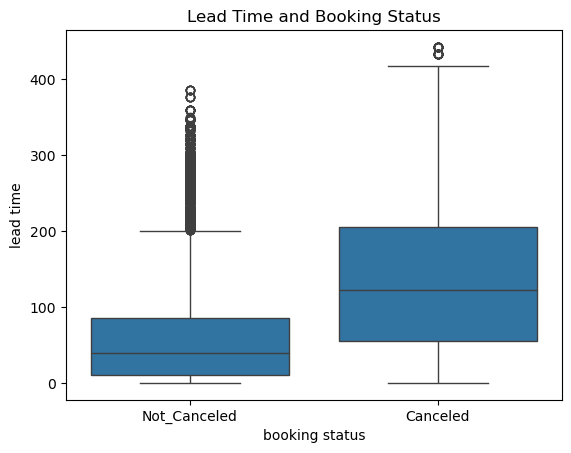

In [12]:
sns.boxplot(x='booking status', y='lead time', data=df)
plt.title("Lead Time and Booking Status");

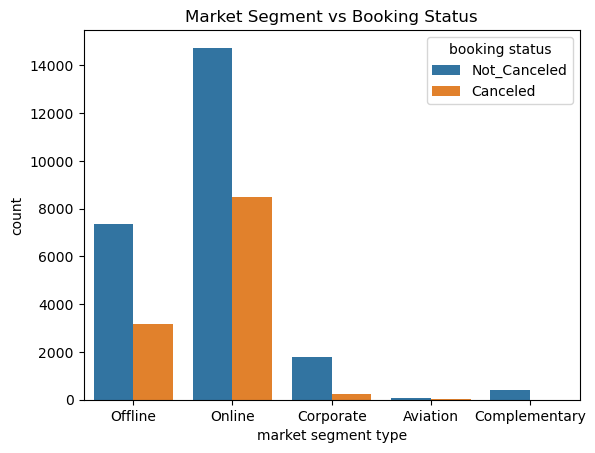

In [13]:
sns.countplot(x='market segment type', hue='booking status', data=df)
plt.title("Market Segment vs Booking Status");

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          36285 non-null  int64         
 1   number of children        36285 non-null  int64         
 2   number of weekend nights  36285 non-null  int64         
 3   number of week nights     36285 non-null  int64         
 4   type of meal              36285 non-null  object        
 5   car parking space         36285 non-null  int64         
 6   room type                 36285 non-null  object        
 7   lead time                 36285 non-null  int64         
 8   market segment type       36285 non-null  object        
 9   repeated                  36285 non-null  int64         
 10  P-C                       36285 non-null  int64         
 11  P-not-C                   36285 non-null  int64         
 12  average price     

In [15]:
df = df.dropna(subset=['date of reservation'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 0 to 36283
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          14149 non-null  int64         
 1   number of children        14149 non-null  int64         
 2   number of weekend nights  14149 non-null  int64         
 3   number of week nights     14149 non-null  int64         
 4   type of meal              14149 non-null  object        
 5   car parking space         14149 non-null  int64         
 6   room type                 14149 non-null  object        
 7   lead time                 14149 non-null  int64         
 8   market segment type       14149 non-null  object        
 9   repeated                  14149 non-null  int64         
 10  P-C                       14149 non-null  int64         
 11  P-not-C                   14149 non-null  int64         
 12  average price          

<Axes: >

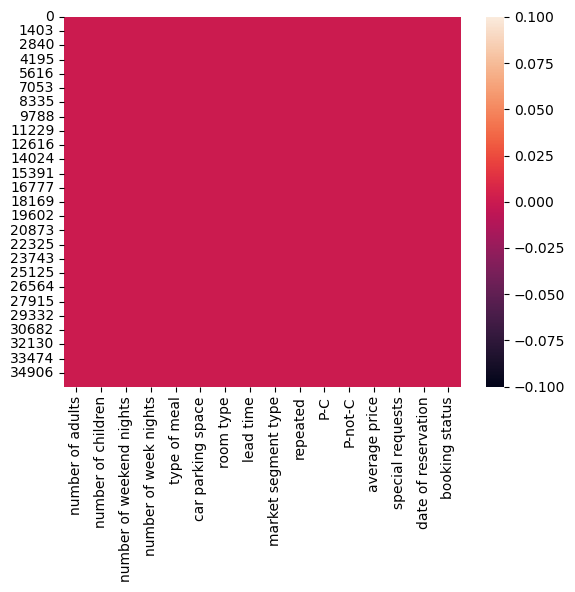

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 0 to 36283
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          14149 non-null  int64         
 1   number of children        14149 non-null  int64         
 2   number of weekend nights  14149 non-null  int64         
 3   number of week nights     14149 non-null  int64         
 4   type of meal              14149 non-null  object        
 5   car parking space         14149 non-null  int64         
 6   room type                 14149 non-null  object        
 7   lead time                 14149 non-null  int64         
 8   market segment type       14149 non-null  object        
 9   repeated                  14149 non-null  int64         
 10  P-C                       14149 non-null  int64         
 11  P-not-C                   14149 non-null  int64         
 12  average price          

In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          14149 non-null  int64         
 1   number of children        14149 non-null  int64         
 2   number of weekend nights  14149 non-null  int64         
 3   number of week nights     14149 non-null  int64         
 4   type of meal              14149 non-null  object        
 5   car parking space         14149 non-null  int64         
 6   room type                 14149 non-null  object        
 7   lead time                 14149 non-null  int64         
 8   market segment type       14149 non-null  object        
 9   repeated                  14149 non-null  int64         
 10  P-C                       14149 non-null  int64         
 11  P-not-C                   14149 non-null  int64         
 12  average price     

In [20]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-02-10,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-06-11,Not_Canceled
2,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-11-04,Canceled
3,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,2018-06-07,Not_Canceled
4,1,0,1,0,Not Selected,0,Room_Type 1,0,Online,0,0,0,85.03,0,2018-11-09,Not_Canceled


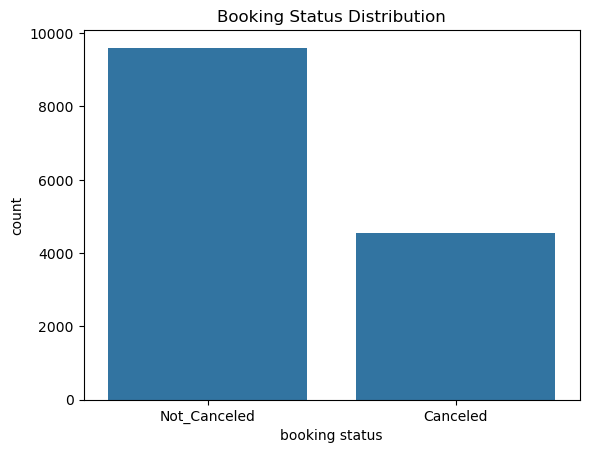

In [21]:
sns.countplot(x='booking status', data=df)
plt.title("Booking Status Distribution");

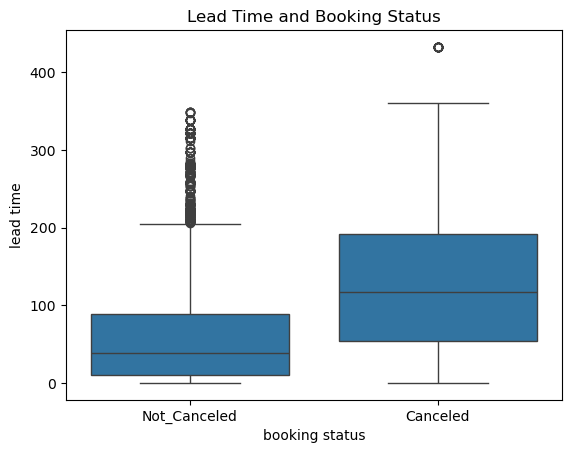

In [22]:
sns.boxplot(x='booking status', y='lead time', data=df)
plt.title("Lead Time and Booking Status");

In [23]:
# Outliers
# Calculate IQR
Q1 = df['lead time'].quantile(0.25)
Q3 = df['lead time'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lead time lower bound: {lower_bound}, upper bound: {upper_bound}")

Lead time lower bound: -143.5, upper bound: 284.5


In [24]:
outliers = df[(df['lead time'] < lower_bound) | (df['lead time'] > upper_bound)]
print("Number of outliers in lead time:", outliers.shape[0])


Number of outliers in lead time: 391


In [25]:
df['lead time'] = np.where(df['lead time'] > upper_bound, upper_bound,
                           np.where(df['lead time'] < lower_bound, lower_bound, df['lead time']))

In [26]:
print("Minimum lead time:", df['lead time'].min())
print("Maximum lead time:", df['lead time'].max())

Minimum lead time: 0.0
Maximum lead time: 284.5


C:\Users\Holiness\AppData\Local\Temp\ipykernel_26560\4058863824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking status', y='lead time', data=df, palette=['#66b3ff','#99ff99'])


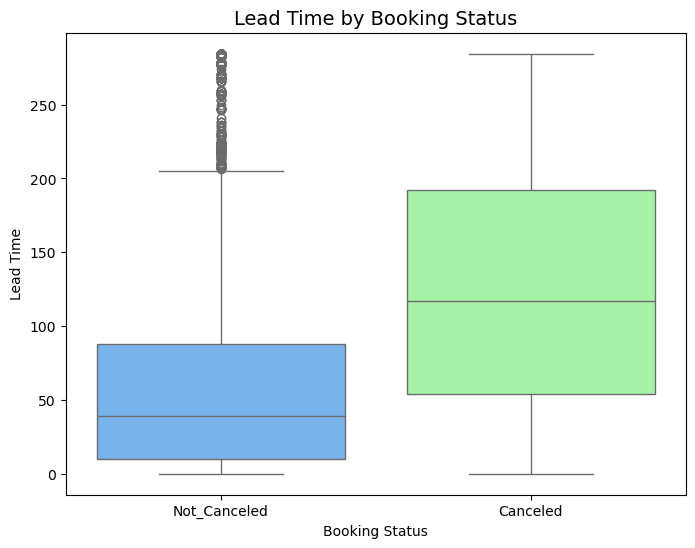

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='booking status', y='lead time', data=df, palette=['#66b3ff','#99ff99'])
plt.title('Lead Time by Booking Status', fontsize=14)
plt.xlabel('Booking Status')
plt.ylabel('Lead Time')
plt.show()

In [28]:
outliers = df[(df['lead time'] < lower_bound) | (df['lead time'] > upper_bound)]
print("Number of outliers in lead time:", outliers.shape[0])

Number of outliers in lead time: 0


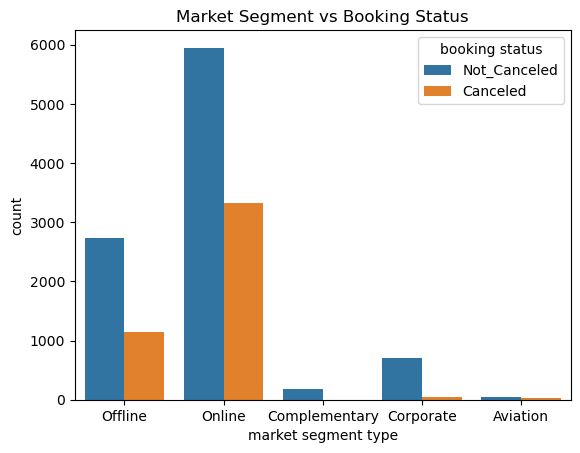

In [29]:
sns.countplot(x='market segment type', hue='booking status', data=df)
plt.title("Market Segment vs Booking Status");

In [30]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,0,0,88.00,0,2015-02-10,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,0,0,106.68,1,2018-06-11,Not_Canceled
2,1,0,1,2,Not Selected,0,Room_Type 1,48.0,Online,0,0,0,77.00,0,2018-11-04,Canceled
3,1,1,0,4,Meal Plan 1,0,Room_Type 1,121.0,Offline,0,0,0,96.90,1,2018-06-07,Not_Canceled
4,1,0,1,0,Not Selected,0,Room_Type 1,0.0,Online,0,0,0,85.03,0,2018-11-09,Not_Canceled


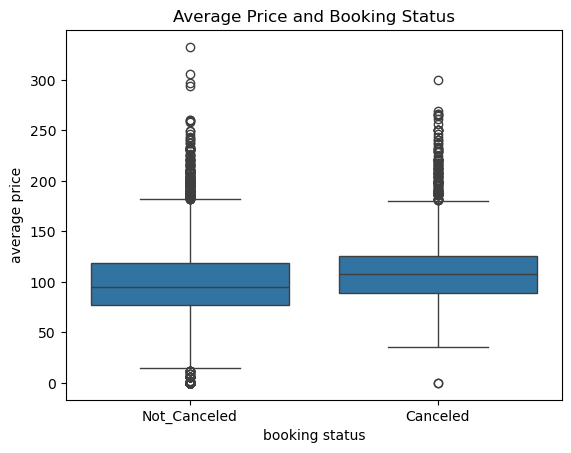

In [31]:
sns.boxplot(x='booking status', y='average price', data=df)
plt.title("Average Price and Booking Status");

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          14149 non-null  int64         
 1   number of children        14149 non-null  int64         
 2   number of weekend nights  14149 non-null  int64         
 3   number of week nights     14149 non-null  int64         
 4   type of meal              14149 non-null  object        
 5   car parking space         14149 non-null  int64         
 6   room type                 14149 non-null  object        
 7   lead time                 14149 non-null  float64       
 8   market segment type       14149 non-null  object        
 9   repeated                  14149 non-null  int64         
 10  P-C                       14149 non-null  int64         
 11  P-not-C                   14149 non-null  int64         
 12  average price     

In [44]:
affected_column = ['average price']

In [33]:
Q1 = df['average price'].quantile(0.25)
Q3 = df['average price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"average price lower bound: {lower_bound}, upper bound: {upper_bound}")

average price lower bound: 20.749999999999993, upper bound: 179.55


In [34]:
outliers = df[(df['average price'] < lower_bound) | (df['average price'] > upper_bound)]
print("Number of outliers in lead time:", outliers.shape[0])

Number of outliers in lead time: 628


In [47]:
df[affected_column] = df[affected_column].clip(lower=lower_bound, upper=upper_bound, axis=1)

In [48]:
print("Minimum average price:", df['average price'].min())
print("Maximum average price:", df['average price'].max())

Minimum average price: 20.749999999999993
Maximum average price: 179.55


C:\Users\Holiness\AppData\Local\Temp\ipykernel_26560\2462940902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking status', y='average price', data=df, palette=['#66b3ff','#99ff99'])


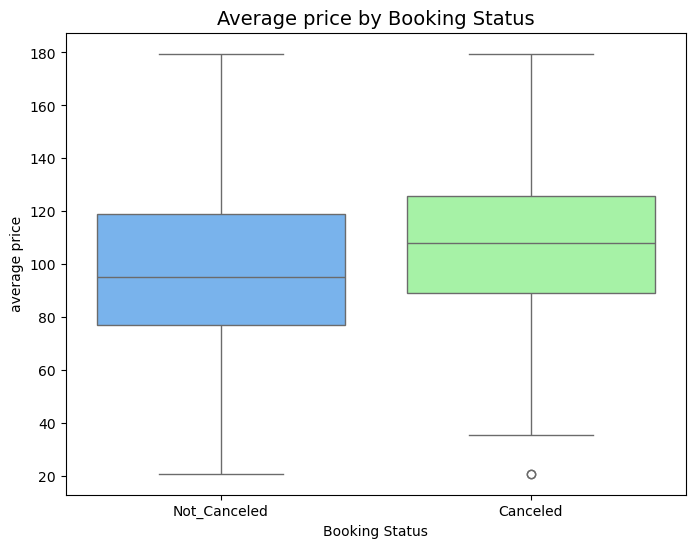

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='booking status', y='average price', data=df, palette=['#66b3ff','#99ff99'])
plt.title('Average price by Booking Status', fontsize=14)
plt.xlabel('Booking Status')
plt.ylabel('average price')
plt.show()

In [49]:
outliers = df[(df['average price'] < lower_bound) | (df['average price'] > upper_bound)]
print("Number of outliers in lead time:", outliers.shape[0])

Number of outliers in lead time: 0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          14149 non-null  int64         
 1   number of children        14149 non-null  int64         
 2   number of weekend nights  14149 non-null  int64         
 3   number of week nights     14149 non-null  int64         
 4   type of meal              14149 non-null  object        
 5   car parking space         14149 non-null  int64         
 6   room type                 14149 non-null  object        
 7   lead time                 14149 non-null  float64       
 8   market segment type       14149 non-null  object        
 9   repeated                  14149 non-null  int64         
 10  P-C                       14149 non-null  int64         
 11  P-not-C                   14149 non-null  int64         
 12  average price     

In [50]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,0,0,88.00,0,2015-02-10,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,0,0,106.68,1,2018-06-11,Not_Canceled
2,1,0,1,2,Not Selected,0,Room_Type 1,48.0,Online,0,0,0,77.00,0,2018-11-04,Canceled
3,1,1,0,4,Meal Plan 1,0,Room_Type 1,121.0,Offline,0,0,0,96.90,1,2018-06-07,Not_Canceled
4,1,0,1,0,Not Selected,0,Room_Type 1,0.0,Online,0,0,0,85.03,0,2018-11-09,Not_Canceled


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   number of adults          14149 non-null  int64         
 1   number of children        14149 non-null  int64         
 2   number of weekend nights  14149 non-null  int64         
 3   number of week nights     14149 non-null  int64         
 4   type of meal              14149 non-null  object        
 5   car parking space         14149 non-null  int64         
 6   room type                 14149 non-null  object        
 7   lead time                 14149 non-null  float64       
 8   market segment type       14149 non-null  object        
 9   repeated                  14149 non-null  int64         
 10  P-C                       14149 non-null  int64         
 11  P-not-C                   14149 non-null  int64         
 12  average price     

### Feature Encoding

In [52]:
encoder = LabelEncoder()

In [53]:
df["market segment type"].value_counts()

market segment type
Online           9275
Offline          3887
Corporate         748
Complementary     176
Aviation           63
Name: count, dtype: int64

In [54]:
encoder.fit(df["market segment type"])

LabelEncoder()

In [55]:
df["market segment type"]

0        Offline
1         Online
2         Online
3        Offline
4         Online
          ...   
14144     Online
14145    Offline
14146     Online
14147     Online
14148    Offline
Name: market segment type, Length: 14149, dtype: object

In [56]:
encoder.transform(df["market segment type"])

array([3, 4, 4, ..., 4, 4, 3])

In [91]:
df["market segment type"] = encoder.fit_transform(df["market segment type"])
df["booking status"] = encoder.fit_transform(df["booking status"])


In [74]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,0,0,0,1.827130,3,0,0,0,-0.459371,0,2015-02-10,1
1,1,0,1,3,3,0,0,-0.979729,4,0,0,0,0.135302,1,2018-06-11,1
2,1,0,1,2,3,0,0,-0.428611,4,0,0,0,-0.809553,0,2018-11-04,0
3,1,1,0,4,0,0,0,0.507009,3,0,0,0,-0.176042,1,2018-06-07,1
4,1,0,1,0,3,0,0,-1.043813,4,0,0,0,-0.553920,0,2018-11-09,1


### Feature Scaling

In [59]:
scaler = StandardScaler()
numeric_cols = ['lead time', 'average price']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [60]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,1.827130,3,0,0,0,-0.459371,0,2015-02-10,1
1,1,0,1,3,Not Selected,0,Room_Type 1,-0.979729,4,0,0,0,0.135302,1,2018-06-11,1
2,1,0,1,2,Not Selected,0,Room_Type 1,-0.428611,4,0,0,0,-0.809553,0,2018-11-04,0
3,1,1,0,4,Meal Plan 1,0,Room_Type 1,0.507009,3,0,0,0,-0.176042,1,2018-06-07,1
4,1,0,1,0,Not Selected,0,Room_Type 1,-1.043813,4,0,0,0,-0.553920,0,2018-11-09,1


In [62]:
df["booking status"].value_counts()

booking status
1    9604
0    4545
Name: count, dtype: int64

In [64]:
df["booking status"].value_counts(normalize=True)*100

booking status
1    67.877589
0    32.122411
Name: proportion, dtype: float64

<Axes: xlabel='booking status', ylabel='count'>

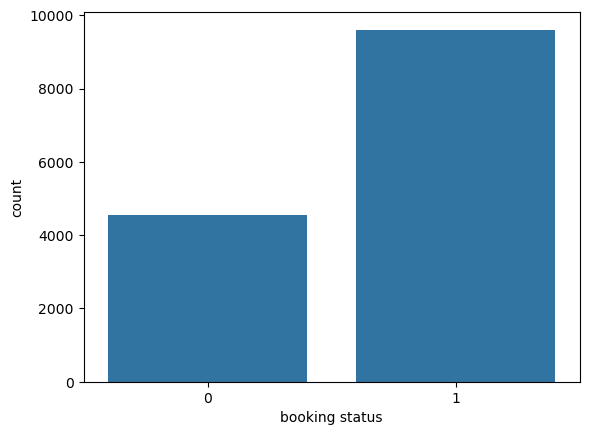

In [65]:
sns.countplot(x=df["booking status"])

In [66]:
!pip install imbalanced-learn

### Split Data for Training and Testing

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
X = df.drop("booking status", axis=1)
y = df["booking status"]

In [85]:
X.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation
0,1,1,2,5,0,0,0,1.827130,3,0,0,0,-0.459371,0,2015-02-10
1,1,0,1,3,3,0,0,-0.979729,4,0,0,0,0.135302,1,2018-06-11
2,1,0,1,2,3,0,0,-0.428611,4,0,0,0,-0.809553,0,2018-11-04
3,1,1,0,4,0,0,0,0.507009,3,0,0,0,-0.176042,1,2018-06-07
4,1,0,1,0,3,0,0,-1.043813,4,0,0,0,-0.553920,0,2018-11-09


In [93]:
X['reservation_year'] = X['date of reservation'].dt.year
X['reservation_month'] = X['date of reservation'].dt.month
X['reservation_day'] = X['date of reservation'].dt.day

In [95]:
X.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,reservation_year,reservation_month,reservation_day
0,1,1,2,5,0,0,0,1.827130,3,0,0,0,-0.459371,0,2015-02-10,2015,2,10
1,1,0,1,3,3,0,0,-0.979729,4,0,0,0,0.135302,1,2018-06-11,2018,6,11
2,1,0,1,2,3,0,0,-0.428611,4,0,0,0,-0.809553,0,2018-11-04,2018,11,4
3,1,1,0,4,0,0,0,0.507009,3,0,0,0,-0.176042,1,2018-06-07,2018,6,7
4,1,0,1,0,3,0,0,-1.043813,4,0,0,0,-0.553920,0,2018-11-09,2018,11,9


In [97]:
X = X.drop(['date of reservation'], axis=1)

In [98]:
X.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,reservation_year,reservation_month,reservation_day
0,1,1,2,5,0,0,0,1.827130,3,0,0,0,-0.459371,0,2015,2,10
1,1,0,1,3,3,0,0,-0.979729,4,0,0,0,0.135302,1,2018,6,11
2,1,0,1,2,3,0,0,-0.428611,4,0,0,0,-0.809553,0,2018,11,4
3,1,1,0,4,0,0,0,0.507009,3,0,0,0,-0.176042,1,2018,6,7
4,1,0,1,0,3,0,0,-1.043813,4,0,0,0,-0.553920,0,2018,11,9


In [86]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: booking status, dtype: int64

In [87]:
smote = SMOTE(random_state=42)

In [99]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [100]:
y_resampled.value_counts()

booking status
1    9604
0    9604
Name: count, dtype: int64

In [101]:
y_resampled.value_counts(normalize=True)*100

booking status
1    50.0
0    50.0
Name: proportion, dtype: float64

<Axes: xlabel='booking status', ylabel='count'>

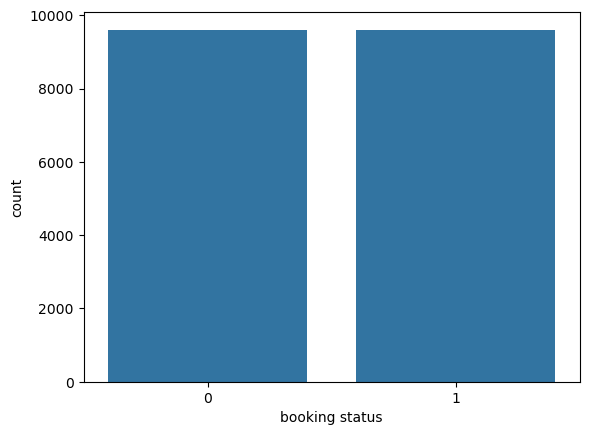

In [102]:
sns.countplot(x=y_resampled)

In [103]:
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)

In [105]:
resampled_data.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,reservation_year,reservation_month,reservation_day
0,1,1,2,5,0,0,0,1.827130,3,0,0,0,-0.459371,0,2015,2,10
1,1,0,1,3,3,0,0,-0.979729,4,0,0,0,0.135302,1,2018,6,11
2,1,0,1,2,3,0,0,-0.428611,4,0,0,0,-0.809553,0,2018,11,4
3,1,1,0,4,0,0,0,0.507009,3,0,0,0,-0.176042,1,2018,6,7
4,1,0,1,0,3,0,0,-1.043813,4,0,0,0,-0.553920,0,2018,11,9


In [106]:
resampled_data["booking status"] = y_resampled

In [107]:
resampled_data

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,reservation_year,reservation_month,reservation_day,booking status
0,1,1,2,5,0,0,0,1.827130,3,0,0,0,-0.459371,0,2015,2,10,1
1,1,0,1,3,3,0,0,-0.979729,4,0,0,0,0.135302,1,2018,6,11,1
2,1,0,1,2,3,0,0,-0.428611,4,0,0,0,-0.809553,0,2018,11,4,0
3,1,1,0,4,0,0,0,0.507009,3,0,0,0,-0.176042,1,2018,6,7,1
4,1,0,1,0,3,0,0,-1.043813,4,0,0,0,-0.553920,0,2018,11,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19203,2,0,2,1,0,0,0,1.282582,3,0,0,0,-0.582895,0,2018,9,7,0
19204,1,0,1,1,1,0,0,2.121914,4,0,0,0,0.154524,0,2018,6,6,0
19205,1,0,1,2,0,0,0,1.263195,3,0,0,0,0.559340,0,2018,10,10,0
19206,1,0,0,1,3,0,0,-0.566513,4,0,0,0,0.249228,0,2018,9,9,0


In [108]:
df.to_csv('cleaned_booking_trends.csv', index=False)

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [111]:
print(f"Training data size {len(X_train)}")
print(f"Testing data size {len(X_test)}")

Training data size 15366
Testing data size 3842


In [112]:
y_train.value_counts(normalize=True) * 100

booking status
0    50.286346
1    49.713654
Name: proportion, dtype: float64

In [113]:
y_test.value_counts(normalize=True) * 100

booking status
1    51.145237
0    48.854763
Name: proportion, dtype: float64

### Model Building

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
model = LogisticRegression(random_state=42)

In [116]:
model.fit(X_train, y_train)

C:\Users\Holiness\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [117]:
y_pred = model.predict(X_test)

In [118]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [119]:
print(y_test[:5])

3234     0
5561     1
14705    0
4347     1
1512     1
Name: booking status, dtype: int64


In [121]:
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
report = classification_report(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)

In [123]:
print("Logistic Regression Classification Report")
print(report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1877
           1       0.80      0.76      0.78      1965

    accuracy                           0.78      3842
   macro avg       0.78      0.78      0.78      3842
weighted avg       0.78      0.78      0.78      3842



In [124]:
y_test.value_counts()

booking status
1    1965
0    1877
Name: count, dtype: int64

In [125]:
len(y_test)

3842

### Model Evaluation

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
# Model Initialization
rf_model = RandomForestClassifier(random_state=42)
# Model Training
rf_model.fit(X_train, y_train)
# Predict on the test set 
y_pred = rf_model.predict(X_test)
report = classification_report(y_test,y_pred)
print("Random Forest Report")
print(report)

Random Forest Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1877
           1       0.92      0.93      0.92      1965

    accuracy                           0.92      3842
   macro avg       0.92      0.92      0.92      3842
weighted avg       0.92      0.92      0.92      3842



In [128]:
# Model Initialization
rf_model = RandomForestClassifier(random_state=42, class_weight={0:1, 1:3})
# Model Training
rf_model.fit(X_train, y_train)
# Predict on the test set 
y_pred = rf_model.predict(X_test)
report = classification_report(y_test,y_pred)
print("Random Forest Report")
print(report)

Random Forest Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1877
           1       0.92      0.93      0.92      1965

    accuracy                           0.92      3842
   macro avg       0.92      0.92      0.92      3842
weighted avg       0.92      0.92      0.92      3842



In [129]:
# Model Initialization
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")
# Model Training
rf_model.fit(X_train, y_train)
# Predict on the test set 
y_pred = rf_model.predict(X_test)
report = classification_report(y_test,y_pred)
print("Random Forest Report")
print(report)

Random Forest Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1877
           1       0.92      0.93      0.92      1965

    accuracy                           0.92      3842
   macro avg       0.92      0.92      0.92      3842
weighted avg       0.92      0.92      0.92      3842



### Trying multiple classification models

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [131]:
!pip install xgboost

  Using cached xgboost-3.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.1-py3-none-win_amd64.whl (72.0 MB)


In [132]:
from xgboost import XGBClassifier

In [133]:
models = {'LogisticRegression': LogisticRegression(random_state=42, class_weight="balanced"),
          'RandomForestClassifier': RandomForestClassifier(random_state=42, class_weight="balanced"),
          'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
          'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
          'SVC': SVC(random_state=42, class_weight="balanced"),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42, class_weight="balanced"),
          'XGBoost': XGBClassifier(eval_metric="mlogloss")
         } 

In [134]:
models.items()

dict_items([('LogisticRegression', LogisticRegression(class_weight='balanced', random_state=42)), ('RandomForestClassifier', RandomForestClassifier(class_weight='balanced', random_state=42)), ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)), ('AdaBoostClassifier', AdaBoostClassifier(random_state=42)), ('SVC', SVC(class_weight='balanced', random_state=42)), ('KNeighborsClassifier', KNeighborsClassifier()), ('DecisionTreeClassifier', DecisionTreeClassifier(class_weight='balanced', random_state=42)), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=

Training LogisticRegression...


C:\Users\Holiness\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Classification Report
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1877
           1       0.81      0.77      0.79      1965

    accuracy                           0.79      3842
   macro avg       0.79      0.79      0.79      3842
weighted avg       0.79      0.79      0.79      3842



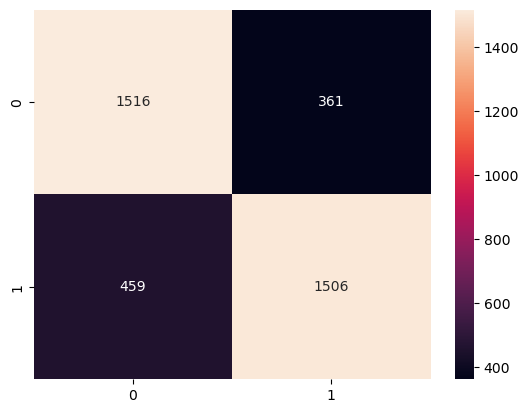

Training RandomForestClassifier...
RandomForestClassifier Classification Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1877
           1       0.92      0.93      0.92      1965

    accuracy                           0.92      3842
   macro avg       0.92      0.92      0.92      3842
weighted avg       0.92      0.92      0.92      3842



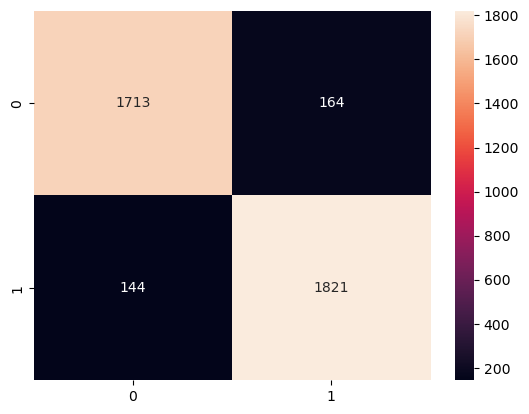

Training GradientBoostingClassifier...
GradientBoostingClassifier Classification Report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1877
           1       0.85      0.87      0.86      1965

    accuracy                           0.86      3842
   macro avg       0.86      0.86      0.86      3842
weighted avg       0.86      0.86      0.86      3842



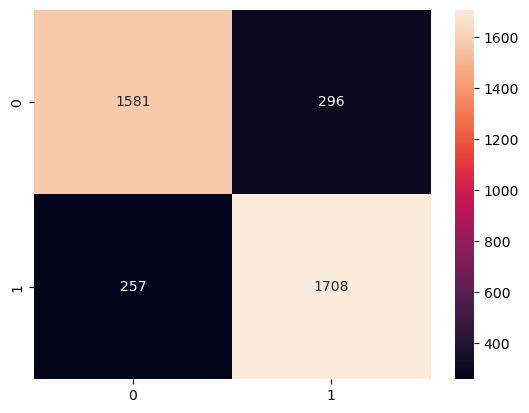

Training AdaBoostClassifier...
AdaBoostClassifier Classification Report
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1877
           1       0.80      0.81      0.80      1965

    accuracy                           0.80      3842
   macro avg       0.80      0.80      0.80      3842
weighted avg       0.80      0.80      0.80      3842



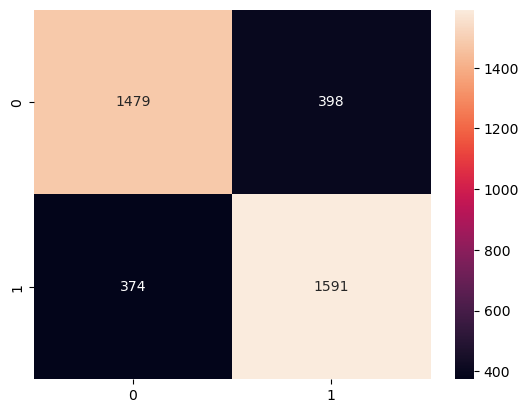

Training SVC...


C:\Users\Holiness\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Holiness\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Holiness\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Holiness\anaconda3\Lib

SVC Classification Report
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1877
           1       0.00      0.00      0.00      1965

    accuracy                           0.49      3842
   macro avg       0.24      0.50      0.33      3842
weighted avg       0.24      0.49      0.32      3842



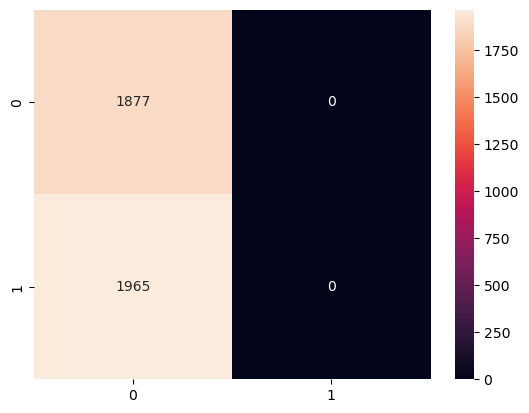

Training KNeighborsClassifier...
KNeighborsClassifier Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1877
           1       0.90      0.82      0.86      1965

    accuracy                           0.86      3842
   macro avg       0.86      0.86      0.86      3842
weighted avg       0.86      0.86      0.86      3842



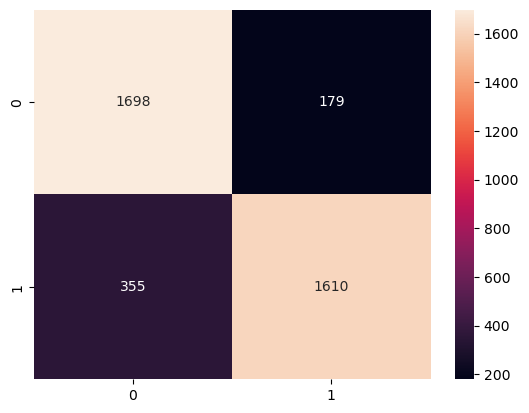

Training DecisionTreeClassifier...
DecisionTreeClassifier Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1877
           1       0.87      0.88      0.87      1965

    accuracy                           0.87      3842
   macro avg       0.87      0.87      0.87      3842
weighted avg       0.87      0.87      0.87      3842



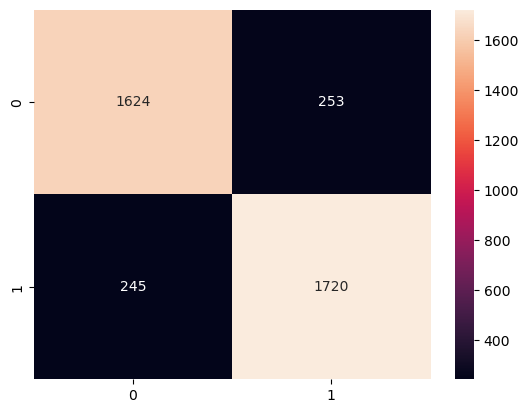

Training XGBoost...
XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1877
           1       0.90      0.91      0.90      1965

    accuracy                           0.90      3842
   macro avg       0.90      0.90      0.90      3842
weighted avg       0.90      0.90      0.90      3842



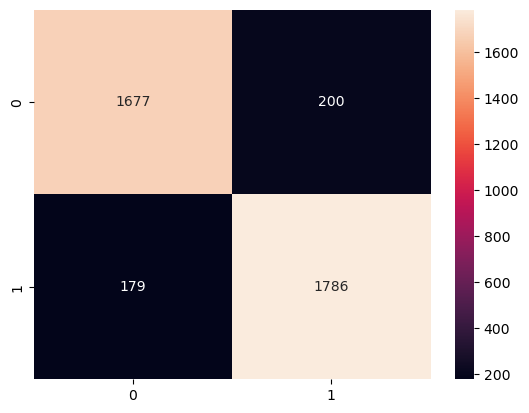

In [135]:
from sklearn.metrics import accuracy_score
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Model Training
    model.fit(X_train, y_train)
    # Predict on the test set 
    y_pred = model.predict(X_test)
    report = classification_report(y_test,y_pred)
    # Evaluate the models
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    matrix = confusion_matrix(y_test,y_pred)

    #Store results
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion matrix': matrix
    }
    print(f'{model_name} Classification Report')
    print(report)
    sns.heatmap(matrix, annot=True, fmt="g")
    plt.show()

### Hyperparameter Tuning

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
# Define the parameter grid
parameter_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [None, 10, 20, 30], 
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

In [138]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"), 
                           param_grid = parameter_grid, 
                           scoring='f1', 
                           cv=5, 
                           n_jobs=1
                        )

In [139]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [140]:
# Best Parameter 
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [141]:
best_rf = grid_search.best_estimator_

In [142]:
y_pred_best_rf = best_rf.predict(X_test)

In [143]:
print("Fine tuned random forest classifier")
report = classification_report(y_test, y_pred_best_rf)
print(report)

Fine tuned random forest classifier
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1877
           1       0.92      0.93      0.92      1965

    accuracy                           0.92      3842
   macro avg       0.92      0.92      0.92      3842
weighted avg       0.92      0.92      0.92      3842



<function matplotlib.pyplot.show(close=None, block=None)>

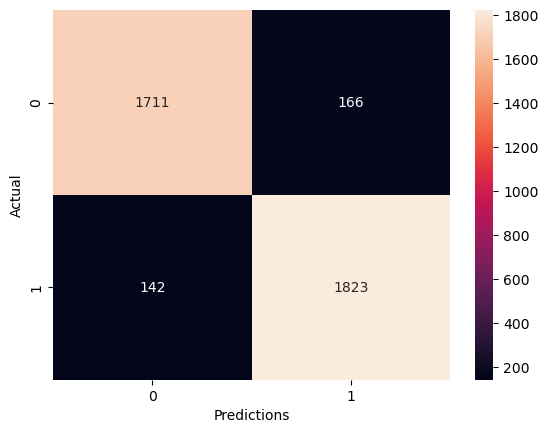

In [144]:
matrix = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(matrix, annot=True, fmt="g")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show

### ROC Curve and AUC Score

In [145]:
from sklearn.metrics import roc_curve, roc_auc_score

In [146]:
y_probs = best_rf.predict_proba(X_test) [:, 1]

In [147]:
# ROC Curve

fpr, tpr, threshold = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

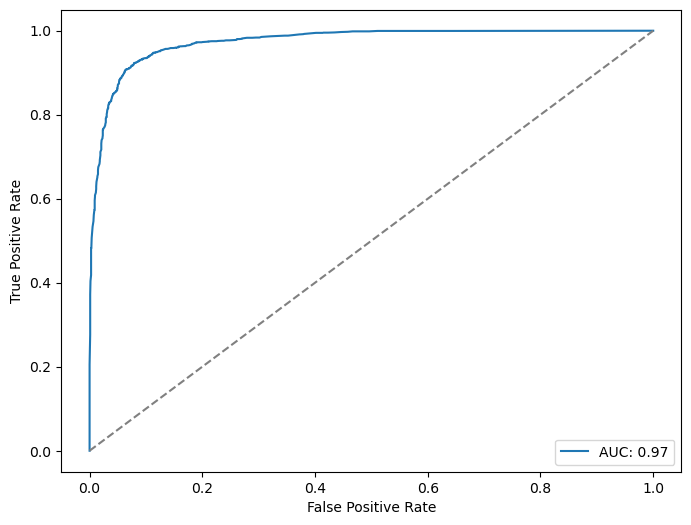

In [148]:
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, label=f"AUC: {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### Feature Importance

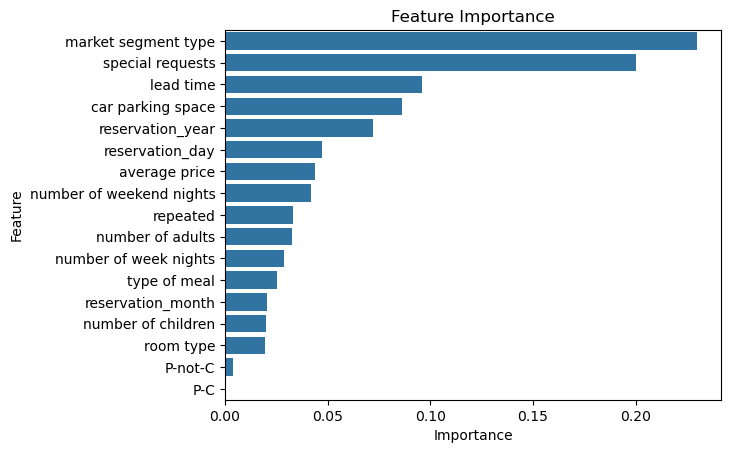

In [150]:
feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': model.feature_importances_}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance");